## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 320 (delta 21), reused 20 (delta 20), pack-reused 282
Receiving objects: 100% (320/320), 1.46 MiB | 2.08 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

     |████████████████████████████████| 102 kB 26.7 MB/s 
     |████████████████████████████████| 51.0 MB 1.2 MB/s 
     |████████████████████████████████| 47.7 MB 60 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [4]:
!curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   886  100   886    0     0   1274      0 --:--:-- --:--:-- --:--:--  1272
100 68.0M  100 68.0M    0     0  17.1M      0  0:00:03  0:00:03 --:--:-- 32.8M
Archive:  roboflow.zip
 extracting: custom_data/README.dataset.txt  
 extracting: custom_data/README.roboflow.txt  
   creating: custom_data/test/
 extracting: custom_data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: custom_data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.xml  
 extracting: custom_data/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: custom_data/test/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.xml  
 extracting: custom_data/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: custom_data/test/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.xml

## Create the Custom Dataset YAML File.

In [5]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'fish', 'jellyfish', 'penguin', 
    'shark', 'puffin', 'stingray',
    'starfish'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 8

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [6]:
!python train.py --config data_configs/custom_data.yaml --epochs 20 --model fasterrcnn_resnet50_fpn --project-name custom_training --batch-size 8

Removing custom_data/train/IMG_3133_jpeg_jpg.rf.f439b9d382fd153b96f0a88cdf169172.xml and corresponding custom_data/train/IMG_3133_jpeg_jpg.rf.f439b9d382fd153b96f0a88cdf169172.jpg
custom_data/train/IMG_3133_jpeg_jpg.rf.f439b9d382fd153b96f0a88cdf169172.xml not found...
Removing IMG_3133_jpeg_jpg.rf.f439b9d382fd153b96f0a88cdf169172.jpg image
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Number of training samples: 447
Number of validation samples: 127

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/faste

## Visualize Validation Results

In [7]:
import matplotlib.pyplot as plt
import glob as glob

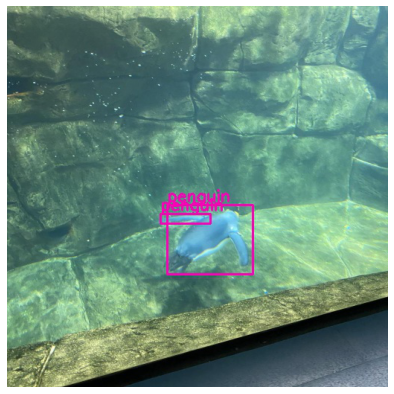

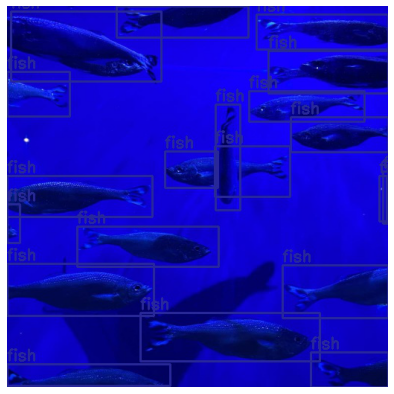

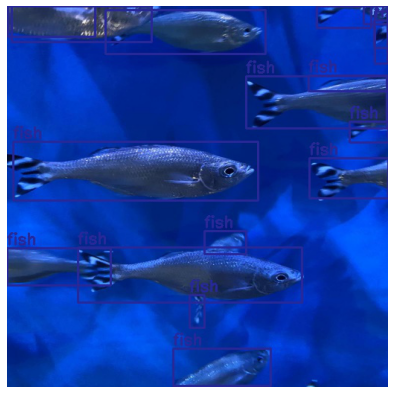

In [8]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()